<a href="https://colab.research.google.com/github/swat90/ChatBot_LLM/blob/main/preproc_twitter_swati.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pre process twitter data loading from Github and convert to vector embeddings of dimension 200.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download NLTK resources (if not already downloaded)
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Load the data from Github repository

In [ ]:
!wget https://dagshub.com/mvlaxminarayan/omdena-hyd-socialmedia-fomo/raw/d1bd0c29a970a3573d49b279ec28a384569d086d/data/data_text/output_twitter_chunk_0.txt

--2024-03-05 08:57:46--  https://dagshub.com/mvlaxminarayan/omdena-hyd-socialmedia-fomo/raw/d1bd0c29a970a3573d49b279ec28a384569d086d/data/data_text/output_twitter_chunk_0.txt
Resolving dagshub.com (dagshub.com)... 35.186.200.224
Connecting to dagshub.com (dagshub.com)|35.186.200.224|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘output_twitter_chunk_0.txt’

output_twitter_chun     [ <=>                ]  59.98K  --.-KB/s    in 0.007s  

2024-03-05 08:57:46 (8.77 MB/s) - ‘output_twitter_chunk_0.txt’ saved [61417]



Define function for preprocessing the data

In [ ]:
def preprocess_text(text):
    # Remove mentions, RT (retweet), and URLs
    text = re.sub(r'@[A-Za-z0-9_]+|RT|http\S+', '', text)

    # Tokenization
    tokens = word_tokenize(text.lower())

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.isalnum() and token not in stop_words]

    # Stemming
    porter = PorterStemmer()
    tokens = [porter.stem(token) for token in tokens]

    return ' '.join(tokens)

Read input, apply preprocess function and save to output

In [ ]:
# Input file path
input_path = "/content/output_twitter_chunk_0.txt"

# Read the content of the file
with open(input_path, 'r', encoding='utf-8') as input_file:
    data = input_file.read()

# Preprocess the text content
preprocessed_data = preprocess_text(data)

# Save the preprocessed data to a new file
output_path = "/content/preprocessed_output_chunk_0.txt"
with open(output_path, 'w', encoding='utf-8') as output_file:
    output_file.write(preprocessed_data)

print(f"Preprocessed data saved to: {output_path}")

Preprocessed data saved to: /content/preprocessed_output_chunk_0.txt


Find most common words and visulize

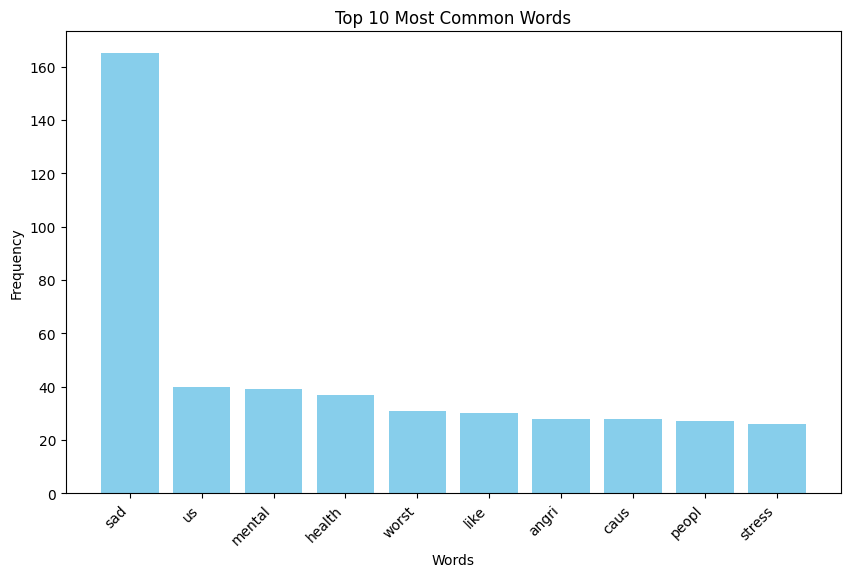

In [ ]:
import matplotlib.pyplot as plt

# Assuming preprocessed_text contains the tokenized text
tokens = preprocessed_text.split()

# Count word frequencies
word_frequencies = Counter(tokens)

# Find the most common words (adjust the number as needed)
most_common_words = word_frequencies.most_common(10)

# Extract data for plotting
words, frequencies = zip(*most_common_words)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words')
plt.xticks(rotation=45, ha='right')
plt.show()

Download GloVe Embeddings

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip


--2024-03-05 09:05:03--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-03-05 09:05:03--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-03-05 09:05:04--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

extract the contents

In [ ]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


Load GloVe Embeddings in Python

In [ ]:
import numpy as np
def load_glove_embeddings(file_path):
    embeddings = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

# Specify the path to the GloVe file
glove_path = 'glove.6B.200d.txt'  # Adjust the filename based on your GloVe file
glove_embeddings = load_glove_embeddings(glove_path)

Save GloVe Embeddings

In [ ]:
import pickle

# Save GloVe embeddings to Google Drive
output_path = '/content/drive/MyDrive/glove_embeddings.pkl'
with open(output_path, 'wb') as f:
    pickle.dump(glove_embeddings, f)

Tokenize and Convert Text to Vectors

In [ ]:
def text_to_vectors(text, embeddings):
    words = text.split()
    vectors = [embeddings.get(word, np.zeros_like(embeddings['a'])) for word in words]
    return np.vstack(vectors)

# Read the content of the preprocessed text file
with open("/content/preprocessed_output_chunk_0.txt", 'r', encoding='utf-8') as file:
    preprocessed_text = file.read()

# Use the text_to_vectors function
vectors = text_to_vectors(preprocessed_text, glove_embeddings)


In [ ]:
print(vectors.shape)

(3988, 200)
